<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None
       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
Movie      6126
TV Show    2664
Name: type, dtype: int64


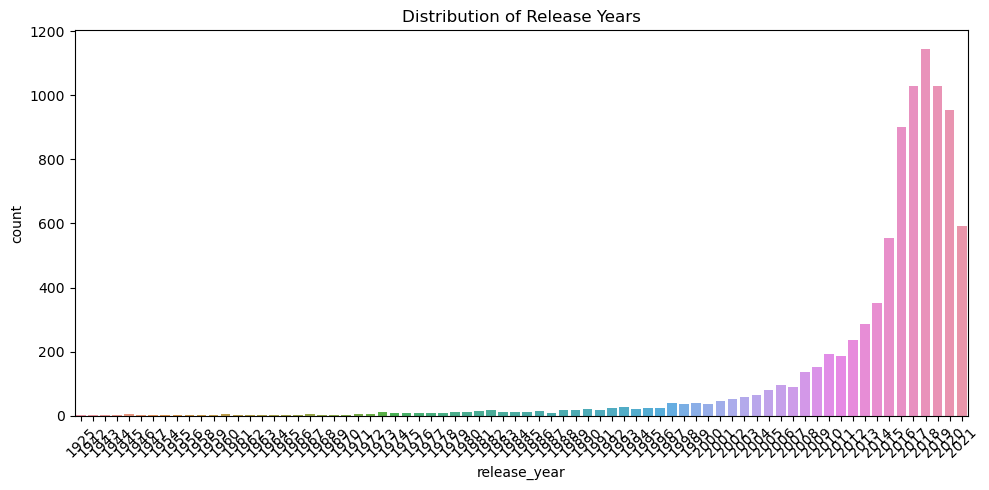

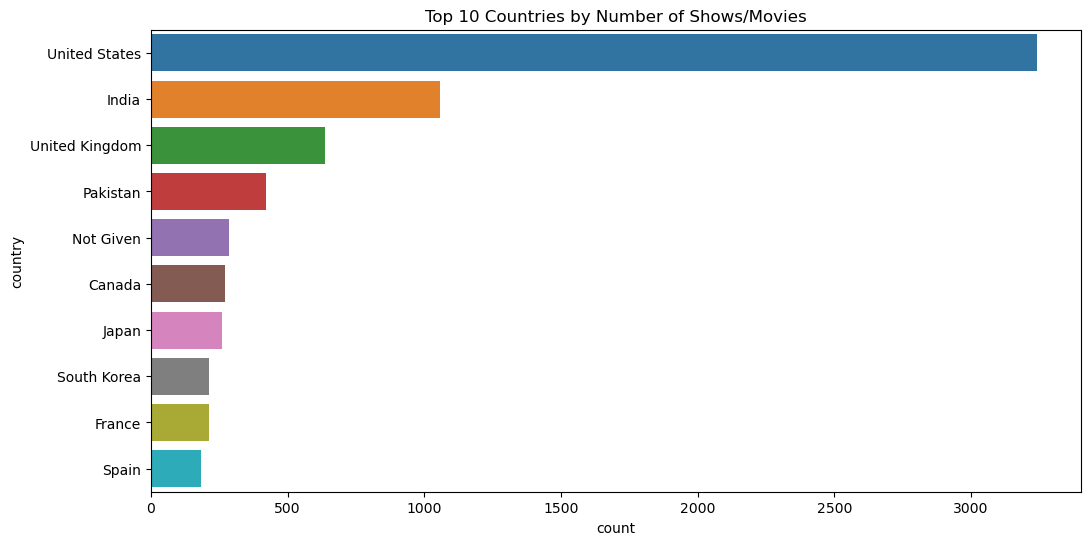

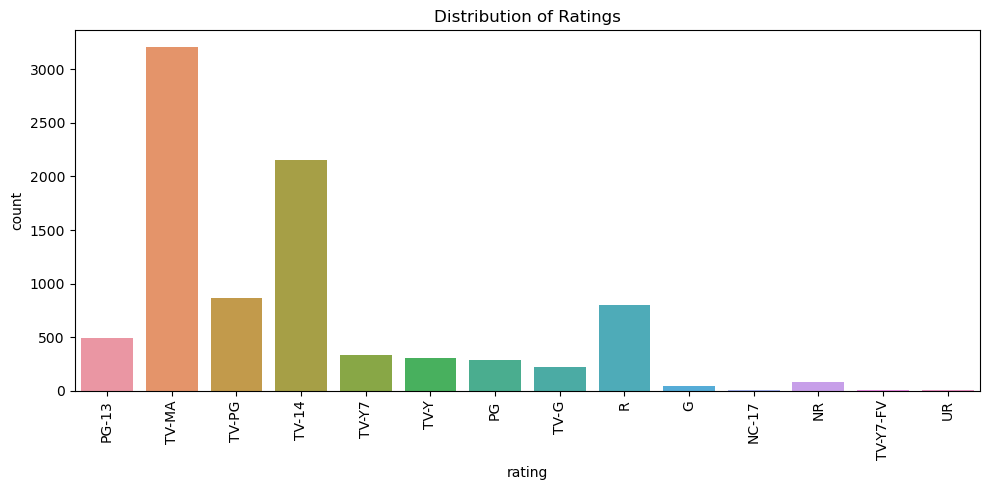

count    8790.000000
mean       69.934471
std        50.794433
min         1.000000
25%         2.000000
50%        88.500000
75%       106.000000
max       312.000000
Name: duration_numeric, dtype: float64


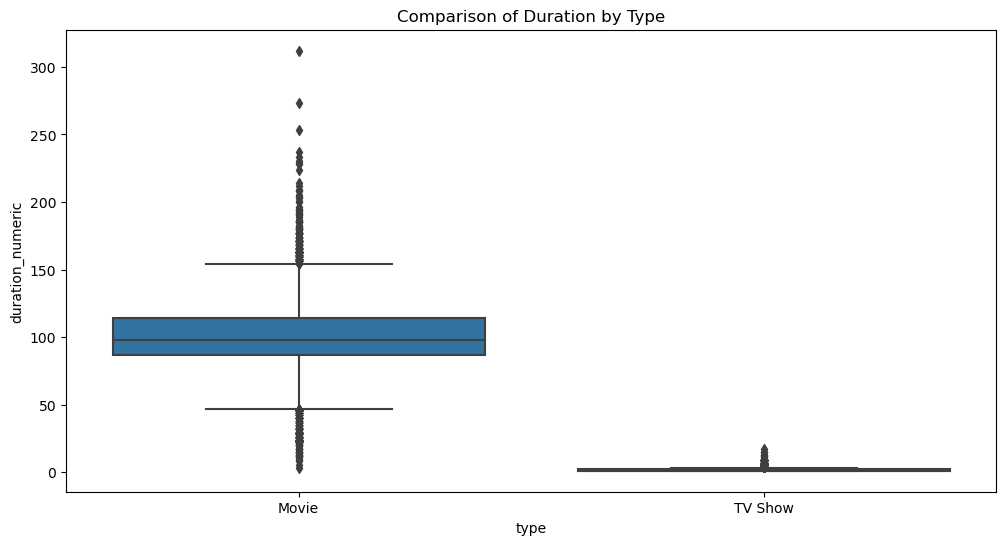

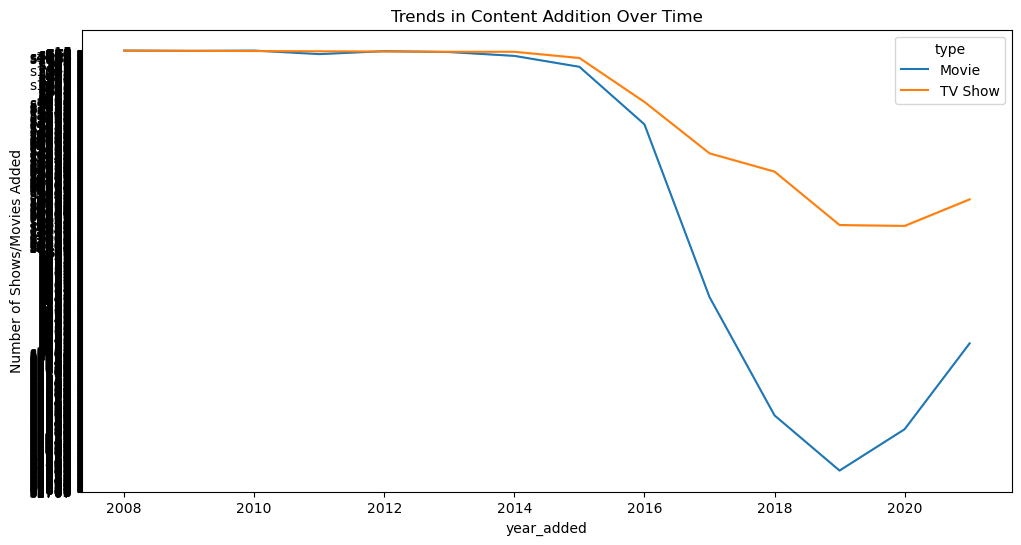

type
Movie      2013.120144
TV Show    2016.627628
Name: release_year, dtype: float64
T-test results -- T-statistic: -17.416600348628048, P-value: 8.113715601925773e-67
Mean Squared Error: 75.42763828832881
R^2 Score: 0.05576591040160872
Cross-validation scores: [ 0.04449652 -0.28029898  0.03893288  0.01167365 -0.13508568]
Average CV score: -0.06405632080464121


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv(r"C:\Users\lroes\Documents\DCU\Data\Portfolio\Projects\Python\Statistics\netflix1.csv")

# Part 1: Descriptive Analysis
def descriptive_analysis(data):
    print(data.info())
    print(data.describe())
    print(data['type'].value_counts())
    
    # Distribution of release years
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x='release_year')
    plt.title('Distribution of Release Years')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Number of shows/movies by country (top 10)
    plt.figure(figsize=(12, 6))
    sns.countplot(y='country', data=data, order=data['country'].value_counts().index[:10])
    plt.title('Top 10 Countries by Number of Shows/Movies')
    plt.show()

    # Rating distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x='rating')
    plt.title('Distribution of Ratings')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Ensure duration_numeric is processed correctly
    data['duration_numeric'] = data['duration'].str.extract('(\d+)').astype(float)
    print(data['duration_numeric'].describe())

    # Duration comparison between Movies and TV Shows
    if 'duration_numeric' in data.columns and data['duration_numeric'].isnull().sum() == 0:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='type', y='duration_numeric', data=data)
        plt.title('Comparison of Duration by Type')
        plt.show()
    else:
        print("Duration numeric column has issues, please check data extraction.")

    # Trends of content addition over years
    data['year_added'] = pd.to_datetime(data['date_added']).dt.year
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='year_added', y='show_id', estimator=len, hue='type')
    plt.title('Trends in Content Addition Over Time')
    plt.ylabel('Number of Shows/Movies Added')
    plt.show()

# Part 2: Inferential Analysis
def inferential_analysis(data):
    # Analyze the average release year for Movies vs TV Shows
    grouped_data = data.groupby('type')['release_year'].mean()
    print(grouped_data)
    
    # Conduct a t-test to see if differences in release year are significant
    from scipy.stats import ttest_ind
    movies = data[data['type'] == 'Movie']['release_year']
    tv_shows = data[data['type'] == 'TV Show']['release_year']
    t_stat, p_val = ttest_ind(movies, tv_shows)
    print(f"T-test results -- T-statistic: {t_stat}, P-value: {p_val}")

# Part 3: Linear Regression with more features
def linear_regression(data):
    # Preprocessing: Extract numeric value from duration
    data['duration_numeric'] = data['duration'].str.extract('(\d+)').astype(float)
    
    # Preprocessing: One-hot encoding for categorical variables (type)
    column_transformer = ColumnTransformer(
        [('type_ohe', OneHotEncoder(), ['type'])],
        remainder='passthrough')
    
    X = data[['type', 'duration_numeric']]
    X_transformed = column_transformer.fit_transform(X)
    y = data['release_year']        # Target
    
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
    
    # Creating and training the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicting and evaluating the model
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Cross-validation to check model consistency
    cv_scores = cross_val_score(model, X_transformed, y, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV score: {np.mean(cv_scores)}")

# Run analyses
descriptive_analysis(data)
inferential_analysis(data)
linear_regression(data)
